# Exploración de Datos de UFC

Este notebook contiene la exploración inicial de los datos extraídos de UFC. Aquí se realiza:
- Carga y visualización preliminar de los conjuntos de datos
- Análisis de la estructura y calidad de los datos
- Estadísticas descriptivas básicas
- Visualizaciones exploratorias para identificar patrones y anomalías


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


---
### Sección de carga de datos

En esta sección se realiza la carga inicial de los datasets principales del proyecto UFC ETL. Se recomienda verificar la ruta y el formato de los archivos antes de continuar con el análisis.

In [2]:
# Cargar los datasets
fights_df = pd.read_csv('../data/raw/raw_fights.csv')
events_df = pd.read_csv('../data/raw/raw_events.csv')
fighters_df = pd.read_csv('../data/raw/raw_fighters.csv')


print("Datasets cargados exitosamente!")
print(f"Fights: {fights_df.shape[0]} filas, {fights_df.shape[1]} columnas")
print(f"Events: {events_df.shape[0]} filas, {events_df.shape[1]} columnas")
print(f"Fighters: {fighters_df.shape[0]} filas, {fighters_df.shape[1]} columnas")

Datasets cargados exitosamente!
Fights: 8428 filas, 38 columnas
Events: 755 filas, 5 columnas
Fighters: 4443 filas, 21 columnas


---
### Visualización preliminar

A continuación se muestran las primeras filas de los datasets para obtener una visión general de la estructura y el contenido de los datos.

In [3]:
# Información general de cada dataset
print("=== FIGHTS DATASET ===")
print(fights_df.info())
print("\nPrimeras 3 filas:")
display(fights_df.head(3))

=== FIGHTS DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8428 entries, 0 to 8427
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_id       8428 non-null   object 
 1   fight_id       8428 non-null   object 
 2   fight_order    8428 non-null   int64  
 3   red_id         8428 non-null   object 
 4   red_name       8428 non-null   object 
 5   blue_id        8428 non-null   object 
 6   blue_name      8428 non-null   object 
 7   winner_id      8203 non-null   object 
 8   weight_class   8428 non-null   object 
 9   referee        8304 non-null   object 
 10  round          8330 non-null   float64
 11  time           8330 non-null   object 
 12  time_format    8330 non-null   object 
 13  method         8330 non-null   object 
 14  details        8256 non-null   object 
 15  bonus          2418 non-null   object 
 16  kd1            8428 non-null   int64  
 17  kd2            8428 non-null 

,event_id,fight_id,fight_order,red_id,red_name,blue_id,blue_name,winner_id,weight_class,referee,round,time,time_format,method,details,bonus,kd1,kd2,str1,str2,td1,td2,sub1,sub2,control_time1,control_time2,sig_head1,sig_head2,sig_body1,sig_body2,sig_leg1,sig_leg2,total_str1,total_str2,pass1,pass2,rev1,rev2
0,5efaaf313b652dd7,de1a3734be60e6a1,1,f166e93d04a8c274,Diego Lopes,52ef95b5860fb28c,Jean Silva,f166e93d04a8c274,Featherweight Bout,Mike Beltran,2.0,4:48,5 Rnd (5-5-5-5-5),KO/TKO,Punches to Head On Ground,"['FIGHT', 'PERF']",1,0,74 of 135,43 of 91,3 of 4,0 of 0,0,0,2:40,0:03,63 of 118,26 of 67,1 of 1,10 of 17,10 of 16,7 of 7,86 of 154,43 of 91,0,0,0,1
1,5efaaf313b652dd7,944b929130b23c2a,2,05339613bf8e9808,Rob Font,9a97acbfd5a08bfa,David Martinez,9a97acbfd5a08bfa,Bantamweight Bout,Dan Miragliotta,3.0,5:00,3 Rnd (5-5-5),Decision - Unanimous,Chris Lee28 - 29.Sal D'amato28 - 29.Junichiro ...,NaN,0,0,49 of 158,62 of 155,0 of 5,0 of 2,0,0,0:59,0:33,40 of 138,33 of 115,7 of 17,10 of 16,2 of 3,19 of 24,49 of 158,115 of 210,0,0,0,0
2,5efaaf313b652dd7,7cbfeba85f86d1bf,3,e132d47bd9efbbe0,Rafa Garcia,7026eca45f65377b,Jared Gordon,e132d47bd9efbbe0,Lightweight Bout,Kerry Hatley,3.0,2:27,3 Rnd (5-5-5),KO/TKO,Elbows to Head From Side Control,NaN,1,0,91 of 162,65 of 186,2 of 3,1 of 3,2,0,2:01,0:09,74 of 144,55 of 171,7 of 7,8 of 13,10 of 11,2 of 2,107 of 179,80 of 201,0,0,1,0


In [4]:
print("=== EVENTS DATASET ===")
print(events_df.info())
print("\nPrimeras 3 filas:")
display(events_df.head(3))

=== EVENTS DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   event_id  755 non-null    object
 1   name      755 non-null    object
 2   date      755 non-null    object
 3   location  755 non-null    object
 4   status    755 non-null    object
dtypes: object(5)
memory usage: 29.6+ KB
None

Primeras 3 filas:


,event_id,name,date,location,status
0,5efaaf313b652dd7,UFC Fight Night: Lopes vs. Silva,"September 13, 2025","San Antonio, Texas, USA",completed
1,6e380a4d73ab4f0e,UFC Fight Night: Imavov vs. Borralho,"September 06, 2025","Paris, Ile-de-France, France",completed
2,754968e325d6f60d,UFC Fight Night: Walker vs. Zhang,"August 23, 2025","Shanghai, Hebei, China",completed


In [5]:
print("=== FIGHTERS DATASET ===")
print(fighters_df.info())
print("\nPrimeras 3 filas:")
display(fighters_df.head(3))

=== FIGHTERS DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4443 entries, 0 to 4442
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fighter_id  4443 non-null   object 
 1   first       4427 non-null   object 
 2   last        4443 non-null   object 
 3   nickname    2465 non-null   object 
 4   height      4089 non-null   object 
 5   weight      4357 non-null   object 
 6   reach       2467 non-null   object 
 7   stance      3574 non-null   object 
 8   wins        4443 non-null   int64  
 9   defeats     4443 non-null   int64  
 10  draws       4443 non-null   int64  
 11  belt        4443 non-null   bool   
 12  dob         3681 non-null   object 
 13  slpm        4443 non-null   float64
 14  str_acc     4443 non-null   object 
 15  sapm        4443 non-null   float64
 16  str_def     4443 non-null   object 
 17  td_avg      4443 non-null   float64
 18  td_acc      4443 non-null   object 
 19  td

,fighter_id,first,last,nickname,height,weight,reach,stance,wins,defeats,draws,belt,dob,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg
0,ac45450f75d14f16,Sarah,D'alelio,The Monster,"5' 7""",145 lbs.,NaN,NaN,11,7,0,False,"Dec 13, 1980",2.40,33%,0.00,100%,0.00,0%,100%,0.0
1,3b6d84343579fd33,Marcos,da Matta,Parrumpinha,"5' 4""",145 lbs.,NaN,NaN,11,3,0,False,"Mar 18, 1973",0.00,0%,0.00,0%,0.00,0%,0%,0.0
2,b0bd0c5425668b8f,Henrique,da Silva,Frankenstein,"6' 3""",205 lbs.,"76.0""",Orthodox,14,5,0,False,"Sep 01, 1989",3.89,60%,5.28,40%,0.25,14%,22%,0.2


---
### Estadísticas descriptivas

Se calculan estadísticas básicas para identificar tendencias generales, valores atípicos y posibles problemas de calidad en los datos.

In [6]:
# Función para analizar valores faltantes y únicos
def analyze_missing_and_unique(df, name):
    print(f"\n=== {name.upper()} ANALYSIS ===")
    
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Unique_Values': [df[col].nunique() for col in df.columns],
        'Data_Type': df.dtypes
    })
    
    # Ordenar por porcentaje de valores faltantes
    missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
    
    display(missing_data)
    
    return missing_data

# Analizar cada dataset
fights_analysis = analyze_missing_and_unique(fights_df, 'Fights')
events_analysis = analyze_missing_and_unique(events_df, 'Events')
fighters_analysis = analyze_missing_and_unique(fighters_df, 'Fighters')


=== FIGHTS ANALYSIS ===


,Column,Missing_Count,Missing_Percentage,Unique_Values,Data_Type
bonus,bonus,6010,71.309919,14,object
winner_id,winner_id,225,2.669673,1832,object
details,details,172,2.040816,4003,object
referee,referee,124,1.471286,239,object
method,method,98,1.162791,10,object
time_format,time_format,98,1.162791,19,object
total_str1,total_str1,98,1.162791,5476,object
total_str2,total_str2,98,1.162791,5215,object
sig_body2,sig_body2,98,1.162791,694,object
sig_body1,sig_body1,98,1.162791,732,object



=== EVENTS ANALYSIS ===


,Column,Missing_Count,Missing_Percentage,Unique_Values,Data_Type
event_id,event_id,0,0.0,755,object
name,name,0,0.0,754,object
date,date,0,0.0,750,object
location,location,0,0.0,173,object
status,status,0,0.0,2,object



=== FIGHTERS ANALYSIS ===


,Column,Missing_Count,Missing_Percentage,Unique_Values,Data_Type
nickname,nickname,1978,44.519469,1939,object
reach,reach,1976,44.474454,27,object
stance,stance,869,19.558857,5,object
dob,dob,762,17.150574,3100,object
height,height,354,7.967589,27,object
weight,weight,86,1.935629,113,object
first,first,16,0.360117,2053,object
last,last,0,0.000000,3310,object
fighter_id,fighter_id,0,0.000000,4443,object
wins,wins,0,0.000000,57,int64


---
### Análisis de correlaciones y relaciones

En esta sección se exploran correlaciones y relaciones entre variables relevantes para el análisis de peleas y luchadores.

---
### Visualización de distribuciones

Se presentan gráficos para analizar la distribución de variables clave, facilitando la detección de sesgos o anomalías en los datos.

In [7]:
# Estadísticas descriptivas para columnas numéricas en fights
print("=== FIGHTS - ESTADÍSTICAS NUMÉRICAS ===")
numeric_cols_fights = fights_df.select_dtypes(include=[np.number]).columns
if len(numeric_cols_fights) > 0:
    display(fights_df[numeric_cols_fights].describe())
else:
    print("No hay columnas numéricas detectadas automáticamente")
    # Intentar convertir algunas columnas que deberían ser numéricas
    numeric_like_cols = ['round', 'kd1', 'kd2']
    for col in numeric_like_cols:
        if col in fights_df.columns:
            try:
                fights_df[col] = pd.to_numeric(fights_df[col], errors='coerce')
            except:
                pass
    
    numeric_cols_fights = fights_df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols_fights) > 0:
        display(fights_df[numeric_cols_fights].describe())

=== FIGHTS - ESTADÍSTICAS NUMÉRICAS ===


,fight_order,round,kd1,kd2,sub1,sub2,pass1,pass2,rev1,rev2
count,8428.000000,8330.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.0,8428.0,8428.000000,8428.000000
mean,6.219150,2.356663,0.241338,0.181182,0.432012,0.315021,0.0,0.0,0.133484,0.132890
std,3.415394,1.016927,0.513392,0.460668,0.872428,0.743519,0.0,0.0,0.423980,0.418959
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,9.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000
max,15.000000,5.000000,5.000000,6.000000,10.000000,7.000000,0.0,0.0,6.000000,5.000000


In [8]:
# Estadísticas descriptivas para fighters
print("=== FIGHTERS - ESTADÍSTICAS NUMÉRICAS ===")
numeric_cols_fighters = fighters_df.select_dtypes(include=[np.number]).columns
if len(numeric_cols_fighters) > 0:
    display(fighters_df[numeric_cols_fighters].describe())
else:
    print("Convirtiendo columnas numéricas...")
    # Columnas que deberían ser numéricas
    numeric_like_cols = ['wins', 'defeats', 'draws', 'slpm', 'str_acc', 'sapm', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']
    for col in numeric_like_cols:
        if col in fighters_df.columns:
            # Limpiar porcentajes y convertir
            fighters_df[col] = fighters_df[col].astype(str).str.replace('%', '').replace('', np.nan)
            fighters_df[col] = pd.to_numeric(fighters_df[col], errors='coerce')
    
    numeric_cols_fighters = fighters_df.select_dtypes(include=[np.number]).columns
    display(fighters_df[numeric_cols_fighters].describe())

=== FIGHTERS - ESTADÍSTICAS NUMÉRICAS ===


,wins,defeats,draws,slpm,sapm,td_avg,sub_avg
count,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000
mean,12.392753,5.644384,0.251632,2.483759,3.186300,1.233108,0.568130
std,9.198639,5.031287,0.797152,2.147977,2.907222,1.910431,1.433277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,0.840000,1.600000,0.000000,0.000000
50%,11.000000,4.000000,0.000000,2.380000,2.960000,0.560000,0.000000
75%,17.000000,8.000000,0.000000,3.670000,4.285000,1.905000,0.700000
max,253.000000,83.000000,11.000000,41.250000,52.500000,32.140000,21.900000


---
### Conclusiones preliminares

Se resumen los hallazgos principales de la exploración inicial y se proponen próximos pasos para el análisis y limpieza de los datos.

=== DISTRIBUCIÓN DE WEIGHT CLASSES ===
weight_class
Lightweight Bout               1364
Welterweight Bout              1299
Middleweight Bout              1059
Featherweight Bout              794
Bantamweight Bout               717
                               ... 
UFC 6 Tournament Title Bout       1
UFC 5 Tournament Title Bout       1
UFC 4 Tournament Title Bout       1
UFC 3 Tournament Title Bout       1
UFC 2 Tournament Title Bout       1
Name: count, Length: 120, dtype: int64


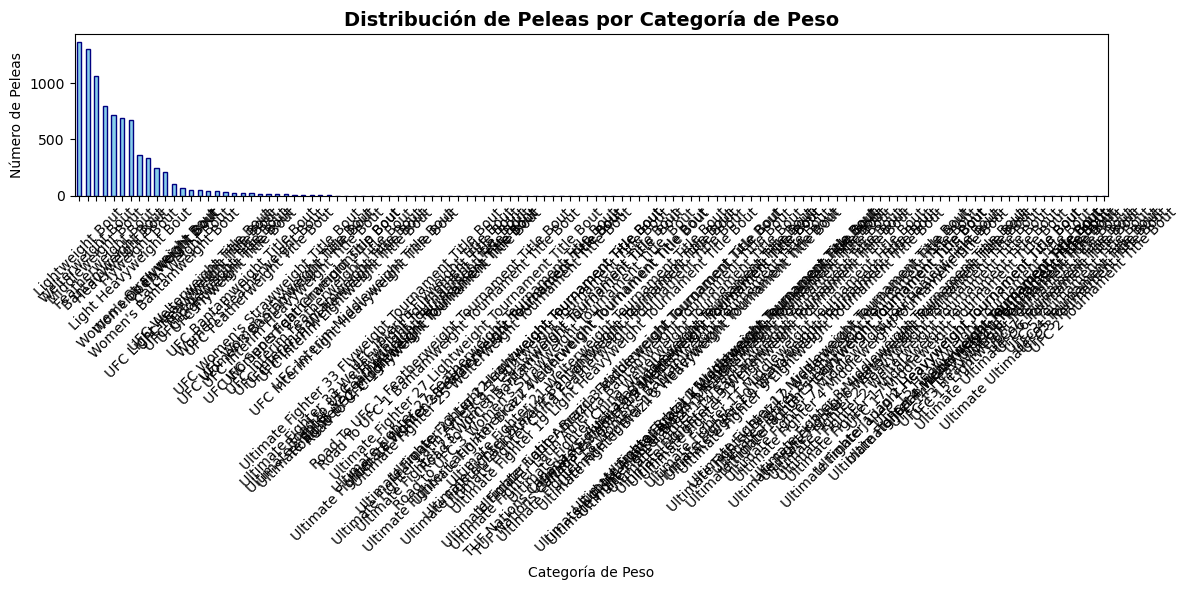

In [9]:
# Análisis de weight classes
if 'weight_class' in fights_df.columns:
    print("=== DISTRIBUCIÓN DE WEIGHT CLASSES ===")
    weight_class_counts = fights_df['weight_class'].value_counts()
    print(weight_class_counts)
    
    # Gráfico de barras
    plt.figure(figsize=(12, 6))
    weight_class_counts.plot(kind='bar', color='skyblue', edgecolor='navy')
    plt.title('Distribución de Peleas por Categoría de Peso', fontsize=14, fontweight='bold')
    plt.xlabel('Categoría de Peso')
    plt.ylabel('Número de Peleas')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Limpiaremos las mas habituales como Lightweight Bout a Lightweight y miraremos los Strings de las categorias que contengan la propia categoria y renombraremos la celda a su nombre correspondiente para acortar la lista de categorías totales

In [10]:
#print(fights_df['weight_class'].unique())
fights_df[fights_df['weight_class'] == "Ultimate Fighter 32 Middleweight Tournament Title Bout"]


,event_id,fight_id,fight_order,red_id,red_name,blue_id,blue_name,winner_id,weight_class,referee,round,time,time_format,method,details,bonus,kd1,kd2,str1,str2,td1,td2,sub1,sub2,control_time1,control_time2,sig_head1,sig_head2,sig_body1,sig_body2,sig_leg1,sig_leg2,total_str1,total_str2,pass1,pass2,rev1,rev2
539,be8ad887e4d674b0,5c5523a6bf83e44f,3,0cd0456d6029cec2,Robert Valentin,d5bab53a1a603aac,Ryan Loder,d5bab53a1a603aac,Ultimate Fighter 32 Middleweight Tournament Ti...,Mark Smith,2.0,1:49,3 Rnd + OT (5-5-5-5),KO/TKO,Elbows to Head From Crucifix,['BELT'],0,0,1 of 2,42 of 52,0 of 1,1 of 3,2,1,1:38,4:45,1 of 2,41 of 51,0 of 0,1 of 1,0 of 0,0 of 0,5 of 6,63 of 73,0,0,1,1



=== MÉTODOS DE FINALIZACIÓN ===
method
Decision - Unanimous       2993
KO/TKO                     2616
Submission                 1613
Decision - Split            802
TKO - Doctor's Stoppage      97
Decision - Majority          95
Overturned                   58
Could Not Continue           31
DQ                           23
Other                         2
Name: count, dtype: int64


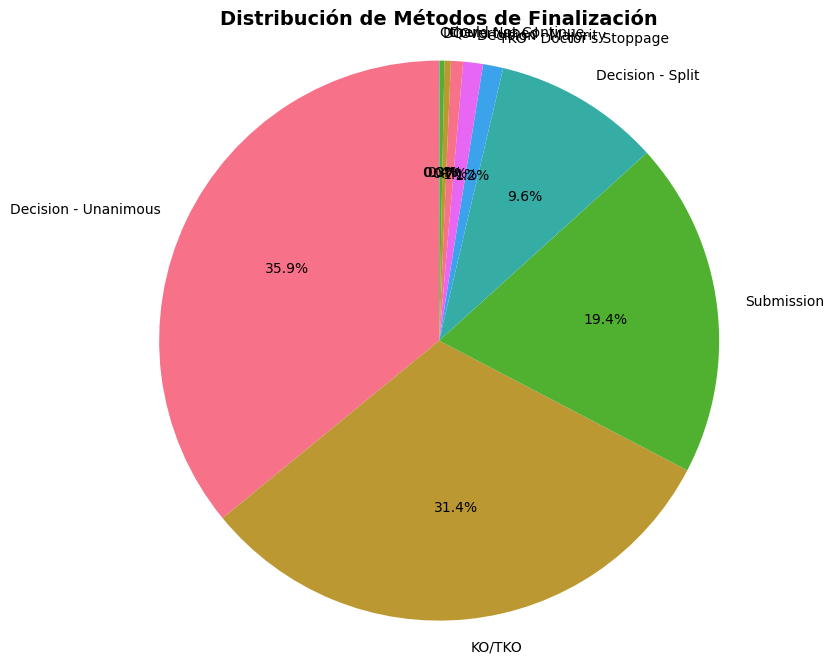

In [11]:
# Análisis de métodos de finalización
if 'method' in fights_df.columns:
    print("\n=== MÉTODOS DE FINALIZACIÓN ===")
    method_counts = fights_df['method'].value_counts()
    print(method_counts)
    
    # Gráfico de pie
    plt.figure(figsize=(10, 8))
    plt.pie(method_counts.values, labels=method_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Métodos de Finalización', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.show()


=== DISTRIBUCIÓN DE STANCE ===
stance
Orthodox       2741
Southpaw        605
Switch          218
Open Stance       7
Sideways          3
Name: count, dtype: int64


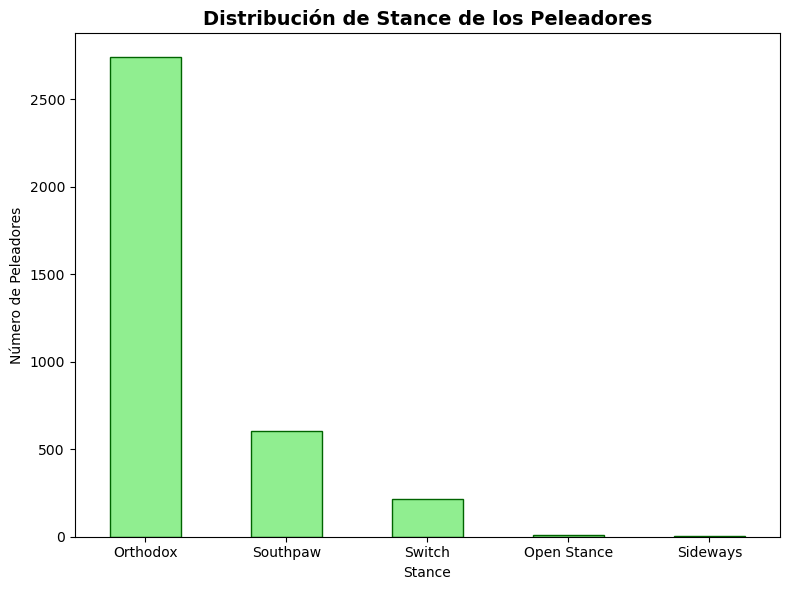

In [12]:
# Análisis de stance (postura) de fighters
if 'stance' in fighters_df.columns:
    print("\n=== DISTRIBUCIÓN DE STANCE ===")
    stance_counts = fighters_df['stance'].value_counts()
    print(stance_counts)
    
    # Gráfico de barras
    plt.figure(figsize=(8, 6))
    stance_counts.plot(kind='bar', color='lightgreen', edgecolor='darkgreen')
    plt.title('Distribución de Stance de los Peleadores', fontsize=14, fontweight='bold')
    plt.xlabel('Stance')
    plt.ylabel('Número de Peleadores')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


=== DISTRIBUCIÓN DE CINTURONES ===
belt
False    4432
True       11
Name: count, dtype: int64


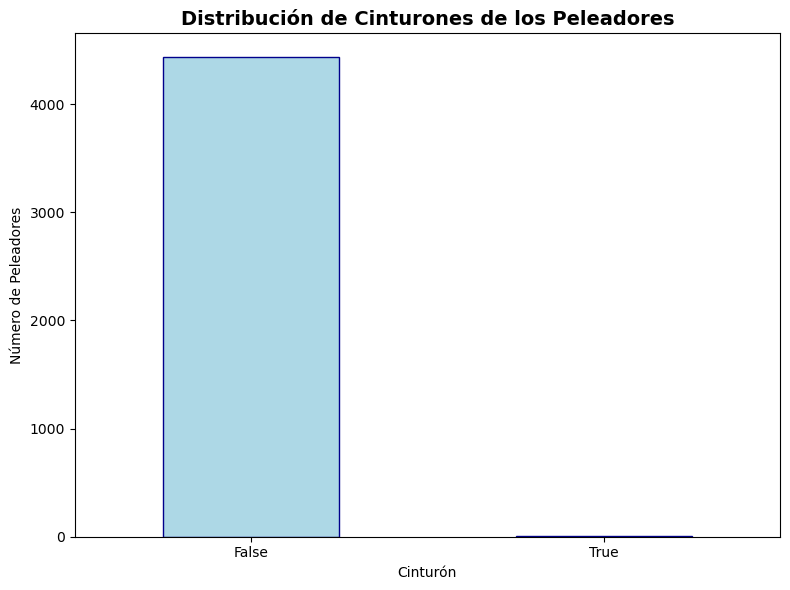

In [13]:
# Análisis de cinturones (belt) de fighters
if 'belt' in fighters_df.columns:
    print("\n=== DISTRIBUCIÓN DE CINTURONES ===")
    belt_counts = fighters_df['belt'].value_counts()
    print(belt_counts)

    # Gráfico de barras
    plt.figure(figsize=(8, 6))
    belt_counts.plot(kind='bar', color='lightblue', edgecolor='darkblue')
    plt.title('Distribución de Cinturones de los Peleadores', fontsize=14, fontweight='bold')
    plt.xlabel('Cinturón')
    plt.ylabel('Número de Peleadores')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## 6. Análisis de Relaciones entre Datasets

In [15]:
# Verificar relaciones entre datasets
print("=== ANÁLISIS DE RELACIONES ===")

# Events únicos en fights vs events dataset
if 'event_id' in fights_df.columns and 'event_id' in events_df.columns:
    events_in_fights = set(fights_df['event_id'].unique())
    events_in_events = set(events_df['event_id'].unique())
    
    print(f"Eventos únicos en fights: {len(events_in_fights)}")
    print(f"Eventos únicos en events: {len(events_in_events)}")
    print(f"Eventos en común: {len(events_in_fights.intersection(events_in_events))}")
    
    if events_in_fights - events_in_events:
        print(f"Eventos en fights pero no en events: {events_in_fights - events_in_events}")
    if events_in_events - events_in_fights:
        print(f"Eventos en events pero no en fights: {events_in_events - events_in_fights}")

print()

# Fighters únicos en fights vs fighters dataset
if all(col in fights_df.columns for col in ['fighter1_id', 'fighter2_id']) and 'fighter_id' in fighters_df.columns:
    fighters_in_fights = set()
    fighters_in_fights.update(fights_df['fighter1_id'].dropna().unique())
    fighters_in_fights.update(fights_df['fighter2_id'].dropna().unique())
    
    fighters_in_fighters = set(fighters_df['fighter_id'].unique())
    
    print(f"Peleadores únicos en fights: {len(fighters_in_fights)}")
    print(f"Peleadores únicos en fighters: {len(fighters_in_fighters)}")
    print(f"Peleadores en común: {len(fighters_in_fights.intersection(fighters_in_fighters))}")
    
    missing_fighters = fighters_in_fights - fighters_in_fighters
    if missing_fighters:
        print(f"Peleadores en fights pero no en fighters dataset: {len(missing_fighters)}")
        if len(missing_fighters) <= 10:
            print(f"IDs faltantes: {missing_fighters}")

=== ANÁLISIS DE RELACIONES ===
Eventos únicos en fights: 753
Eventos únicos en events: 754
Eventos en common: 753
Eventos en events pero no en fights: {'92c96df8bdab5fea'}

Peleadores únicos en fights: 2626
Peleadores únicos en fighters: 4443
Peleadores en común: 2626


## 7. Análisis Temporal (si aplica)

=== ANÁLISIS TEMPORAL DE EVENTOS ===
Rango de fechas: 1994-03-11 00:00:00 a 2025-11-22 00:00:00


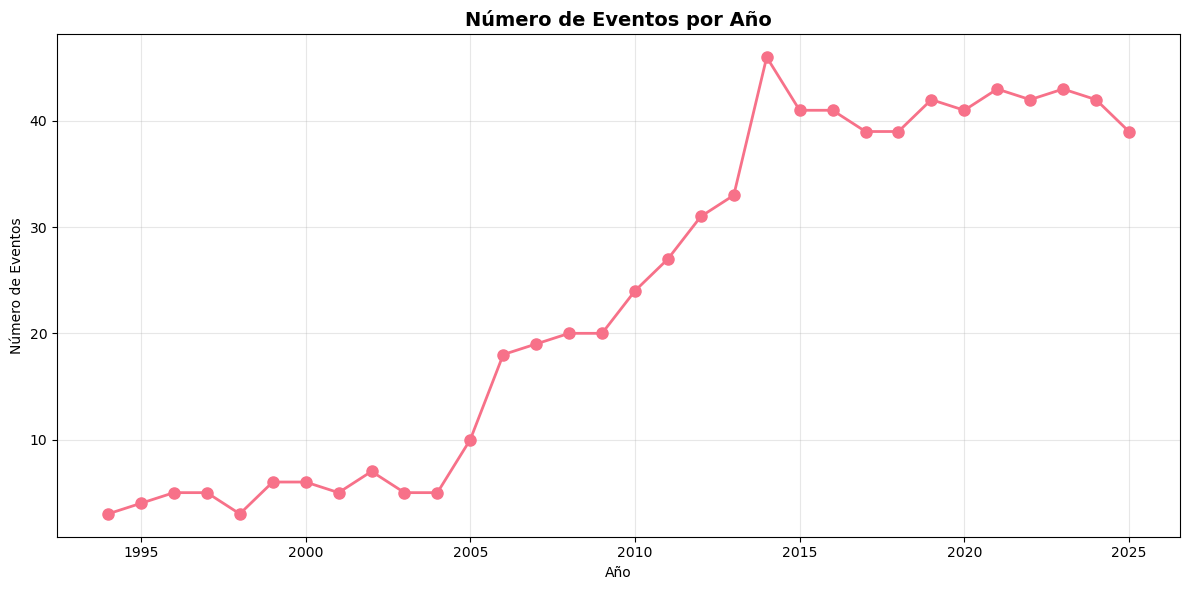

In [16]:
# Análisis temporal de eventos
if 'date' in events_df.columns:
    print("=== ANÁLISIS TEMPORAL DE EVENTOS ===")
    
    # Intentar parsear fechas
    events_df['date_parsed'] = pd.to_datetime(events_df['date'], errors='coerce')
    
    if events_df['date_parsed'].notna().sum() > 0:
        # Estadísticas de fechas
        print(f"Rango de fechas: {events_df['date_parsed'].min()} a {events_df['date_parsed'].max()}")
        
        # Distribución por año
        events_df['year'] = events_df['date_parsed'].dt.year
        year_counts = events_df['year'].value_counts().sort_index()
        
        plt.figure(figsize=(12, 6))
        year_counts.plot(kind='line', marker='o', linewidth=2, markersize=8)
        plt.title('Número de Eventos por Año', fontsize=14, fontweight='bold')
        plt.xlabel('Año')
        plt.ylabel('Número de Eventos')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("No se pudieron parsear las fechas correctamente")
        print("Formatos de fecha encontrados:")
        print(events_df['date'].value_counts().head())

## 8. Resumen de la Exploración

In [17]:
print("=== RESUMEN DE LA EXPLORACIÓN DE DATOS ===")
print()
print("DATASETS ANALIZADOS:")
print(f"1. Fights: {fights_df.shape[0]} peleas con {fights_df.shape[1]} atributos")
print(f"2. Events: {events_df.shape[0]} eventos con {events_df.shape[1]} atributos")
print(f"3. Fighters: {fighters_df.shape[0]} peleadores con {fighters_df.shape[1]} atributos")
print()

print("PRINCIPALES HALLAZGOS:")
print("- Estructura de datos compleja con múltiples métricas por pelea")
print("- Datos de estadísticas detalladas (striking, grappling, etc.)")
print("- Información de peleadores con métricas de rendimiento")
print("- Datos de eventos con fechas y ubicaciones")
print()

print("PRÓXIMOS PASOS:")
print("1. Data Quality Analysis - Identificar problemas de calidad específicos")
print("2. Data Cleaning - Limpiar y estandarizar los datos")
print("3. Feature Engineering - Crear variables derivadas útiles")
print("4. Análisis más profundo de patrones y correlaciones")

=== RESUMEN DE LA EXPLORACIÓN DE DATOS ===

DATASETS ANALIZADOS:
1. Fights: 8426 peleas con 38 atributos
2. Events: 754 eventos con 7 atributos
3. Fighters: 4443 peleadores con 21 atributos

PRINCIPALES HALLAZGOS:
- Estructura de datos compleja con múltiples métricas por pelea
- Datos de estadísticas detalladas (striking, grappling, etc.)
- Información de peleadores con métricas de rendimiento
- Datos de eventos con fechas y ubicaciones

PRÓXIMOS PASOS:
1. Data Quality Analysis - Identificar problemas de calidad específicos
2. Data Cleaning - Limpiar y estandarizar los datos
3. Feature Engineering - Crear variables derivadas útiles
4. Análisis más profundo de patrones y correlaciones


In [18]:
# Guardar un resumen de los hallazgos
summary_data = {
    'dataset': ['fights', 'events', 'fighters'],
    'rows': [fights_df.shape[0], events_df.shape[0], fighters_df.shape[0]],
    'columns': [fights_df.shape[1], events_df.shape[1], fighters_df.shape[1]],
    'missing_columns': [
        fights_analysis[fights_analysis['Missing_Count'] > 0].shape[0],
        events_analysis[events_analysis['Missing_Count'] > 0].shape[0],
        fighters_analysis[fighters_analysis['Missing_Count'] > 0].shape[0]
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('data_exploration_summary.csv', index=False)
print("Resumen guardado en 'data_exploration_summary.csv'")

Resumen guardado en 'data_exploration_summary.csv'
